# Cleaning Data

In [4]:
import pandas as pd

data_path = "/Users/medisa/repos/Test/retail_sales_data.csv"
df = pd.read_csv(data_path)

In [5]:
df.head()
#shows the first 5 rows

,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
0,TXN00001,CUST0052,Camera,Electronics,1,1489.74,2021-12-04,North
1,TXN00002,CUST0093,Monitor,NaN,2,1364.68,12/04/2022,East
2,TXN00003,CUST0015,Smartphone,Accessories,1,1004.30,27/01/2022,East
3,TXN00004,CUST0072,Mouse,NaN,1,91.89,22/10/2022,South
4,TXN00005,CUST0061,Laptop,Accessories,3,1719.75,17/05/2021,NaN


In [6]:
#prints information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    205 non-null    object 
 1   CustomerID       205 non-null    object 
 2   Product          205 non-null    object 
 3   Category         156 non-null    object 
 4   Quantity         205 non-null    int64  
 5   Price            205 non-null    float64
 6   TransactionDate  205 non-null    object 
 7   Region           167 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.9+ KB


In [7]:
#description of the data in the DataFrame
df.describe()

,Quantity,Price
count,205.000000,205.000000
mean,2.653659,1007.179951
std,1.159804,579.154213
min,1.000000,24.210000
25%,2.000000,504.320000
50%,3.000000,932.760000
75%,4.000000,1554.210000
max,4.000000,1992.780000


# Handle missing values

In [8]:
#Check which columns have missing values(to see where the gaps are). This shows for each column, how many missing(NaN) values I have.
df.isnull().sum()

TransactionID       0
CustomerID          0
Product             0
Category           49
Quantity            0
Price               0
TransactionDate     0
Region             38
dtype: int64

In [9]:
#Fill missing values
df['Region'] = df['Region'].fillna('Unknown')
df['Category'] = df['Category'].fillna('Unknown')

In [10]:
#Double-check missing values
df.isnull().sum()

TransactionID      0
CustomerID         0
Product            0
Category           0
Quantity           0
Price              0
TransactionDate    0
Region             0
dtype: int64

# Fix inconsistent formatting

In [11]:
#Strip extra spaces in text columns

print(df.columns)


Index(['TransactionID', 'CustomerID', 'Product', 'Category', 'Quantity',
       'Price', 'TransactionDate', 'Region'],
      dtype='object')


In [12]:
#Strip spaces
df['TransactionID'] = df['TransactionID'].str.strip()
df['CustomerID'] = df['CustomerID'].str.strip()
df['Product'] = df['Product'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Region'] = df['Region'].str.strip()

In [13]:
#or for all string columns at once:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [14]:
#Standardize letter cases
#first letter uppercase
df['Region'] = df['Region'].str.title()

# اومدم ستون ریجن رو از دیتافریم گرفتم
# تبدیلش کردم به استرینگ تا مطمپن بشم چیزی به جز استرینگ نباشه
# متد تایتل رو روی هر کدوم از ردیفای اون ستون اعمال کردم تا بیاد به یه فرم تایتل تبدیلشون کنه (یعنی چی حرف اول کپیتالایز بقیه کوچک)

#or to apply for all the titles
df = df.apply(lambda col: col.str.strip().str.title() if col.dtype == "object" else col)

# روی دیتافریم دارم یه کاری رو انجام میدم چه کاری؟
# ورودی اون کاری که انجام میدم ستونای دیتافریم هست
# کاری که انجام میدم اینه:
# هر ستون رو میام به رشته تدبیل میکنم
# میایم وسیت اسپیس یا کارکاترای اضافی اول و اخرش رو حذف میکنم
# دوباره مطمپن میشم که رشتس
# و بعد تبدیلش میکنم به تیاتل یعنی حرف اول کپیتال بقیش کوچیک

# اینکارو وقتی انجام میدم که نوع اون ستون ابجکت باشه (یعنی جچی)
# یعنی اگر رشته باشه نیاز نیست اینگارو بکنم

# در غیر اینصورت همون مقدار ورودی رو برمیگردونم



In [15]:

#Fix mixed data types

#Convert to numeric:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

#Convert to datetime:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Find duplicates

In [16]:
#Prep, snapshot + backup
orig_rows = len(df)
print("Before cleaning:", orig_rows)

Before cleaning: 205


In [17]:
df_raw = df.copy()  #safety copy

In [18]:
#search for business-key, quick check which columns look high-cardinality(good key candidates). Values close to 1.0 (100%) are often unique identifiers.
(df.nunique().sort_values(ascending=False) / len(df)).head(10)

TransactionID      0.975610
Price              0.975610
CustomerID         0.424390
TransactionDate    0.063415
Product            0.039024
Region             0.024390
Category           0.019512
Quantity           0.019512
dtype: float64

In [19]:
#chech the TransactionID uniqueness
df['TransactionID'].is_unique

False

In [20]:
#Count how many duplicates exist
df['TransactionID'].duplicated().sum()

np.int64(5)

# Detect duplicates



1) Exact row duplicates

In [22]:
#Exact row duplicates (all columns identical)
exact_dupe_count = df.duplicated(keep=False).sum()
exact_dupe_count

np.int64(10)

In [23]:
#preview Exact row duplicates for top 10 columns
df[df.duplicated(keep=False)].sort_values(df.columns.tolist()).head(10)

,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
15,Txn00016,Cust0053,Mouse,Unknown,4,412.34,NaT,East
201,Txn00016,Cust0053,Mouse,Unknown,4,412.34,NaT,East
30,Txn00031,Cust0091,Smartphone,Unknown,1,752.92,NaT,South
202,Txn00031,Cust0091,Smartphone,Unknown,1,752.92,NaT,South
95,Txn00096,Cust0085,Mouse,Gadgets,3,142.13,2021-06-12,North
200,Txn00096,Cust0085,Mouse,Gadgets,3,142.13,2021-06-12,North
128,Txn00129,Cust0012,Smartphone,Unknown,1,1055.89,NaT,North
204,Txn00129,Cust0012,Smartphone,Unknown,1,1055.89,NaT,North
158,Txn00159,Cust0063,Keyboard,Electronics,4,674.10,NaT,West
203,Txn00159,Cust0063,Keyboard,Electronics,4,674.10,NaT,West


2) Key-based duplicates (same ID appearing multiple times)

In [24]:
key_cols = ['TransactionID'] 
key_dupe_count = df.duplicated(subset=key_cols, keep=False).sum()
key_dupe_count

np.int64(10)

In [25]:
#See which keys repeat and how often:
dupe_keys = (df.groupby(key_cols)
               .size()
               .reset_index(name='count')
               .query('count > 1')
               .sort_values('count', ascending=False))
dupe_keys.head(10)

,TransactionID,count
15,Txn00016,2
30,Txn00031,2
95,Txn00096,2
128,Txn00129,2
158,Txn00159,2


In [26]:
#removes all the duplicates, keeps the first
df = df.drop_duplicates()

In [27]:
#to see if it worked:
df.duplicated().sum()           

np.int64(0)

# standardize inconsistent date formats

In [28]:
df["TransactionDate"].head(10)

0   2021-12-04
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [29]:
#Let’s inspect a few of the raw values before pandas converted them
df_raw = pd.read_csv(data_path, dtype=str)
df_raw["TransactionDate"].head(10)

0    2021-12-04
1    12/04/2022
2    27/01/2022
3    22/10/2022
4    17/05/2021
5    06/10/2021
6    26/12/2022
7    01/09/2021
8    22/07/2021
9    05/01/2022
Name: TransactionDate, dtype: object

In [30]:
df_raw["TransactionDate"].str.contains("-").value_counts()


TransactionDate
False    191
True      14
Name: count, dtype: int64

In [31]:
df_raw["TransactionDate"] = pd.to_datetime(
    df_raw["TransactionDate"], 
    dayfirst=True, 
    errors="coerce"
)


In [33]:
df_raw["TransactionDate"].dtype
#pandas successfully converted your TransactionDate column 
#into true datetime objects

dtype('<M8[ns]')

In [36]:
#temporarily turn the column’s values into strings
#wrap the column with .astype(str) before using .str.contains("/")
mask = df_raw["TransactionDate"].astype(str).str.contains("/")


In [38]:
#Finds all rows with slashes (mask)
#Converts only those using the exact format day/month/year.
#Leaves dash-style dates untouched.
#Keeps everything in one column, fully standardized.
mask = df_raw["TransactionDate"].astype(str).str.contains("/")

df_raw.loc[mask, "TransactionDate"] = pd.to_datetime(
    df_raw.loc[mask, "TransactionDate"],
    format="%d/%m/%Y",
    errors="coerce"
)


In [40]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [41]:
df_raw.loc[mask & df_raw["TransactionDate"].isna(), "TransactionDate"]


Series([], Name: TransactionDate, dtype: datetime64[ns])

In [42]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [43]:
df_raw[df_raw["TransactionDate"].isna()].head(10)


,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
1,TXN00002,CUST0093,Monitor,NaN,2,1364.68,NaT,East
2,TXN00003,CUST0015,Smartphone,Accessories,1,1004.3,NaT,East
3,TXN00004,CUST0072,Mouse,NaN,1,91.89,NaT,South
4,TXN00005,CUST0061,Laptop,Accessories,3,1719.75,NaT,NaN
5,TXN00006,CUST0021,Monitor,Accessories,2,1108.25,NaT,South
6,TXN00007,CUST0083,Mouse,Gadgets,4,645.56,NaT,East
7,TXN00008,CUST0087,Tablet,NaN,4,572.66,NaT,North
8,TXN00009,CUST0075,Headphones,Accessories,3,1687.33,NaT,NaN
9,TXN00010,CUST0075,Laptop,NaN,3,647.58,NaT,North
10,TXN00011,CUST0088,Monitor,NaN,2,1644.28,NaT,West


In [45]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [46]:
df_raw["TransactionDate"].astype("string").str.contains("/", na=False).value_counts()


TransactionDate
False    205
Name: count, dtype: Int64

In [47]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [51]:
df_raw["TransactionDate"] = pd.to_datetime(
    df_raw["TransactionDate"],
    format="%d/%m/%Y",
    errors="coerce"
)


In [52]:
df_raw["TransactionDate"].head(10)

0   2021-04-12
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [57]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], dayfirst=True, errors="coerce")
df["TransactionDate"].head(10)


0   2021-12-04
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: TransactionDate, dtype: datetime64[ns]

In [60]:
df_raw = pd.read_csv("retail_sales_data.csv", dtype=str)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    205 non-null    object
 1   CustomerID       205 non-null    object
 2   Product          205 non-null    object
 3   Category         156 non-null    object
 4   Quantity         205 non-null    object
 5   Price            205 non-null    object
 6   TransactionDate  205 non-null    object
 7   Region           167 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


In [63]:
#turn all the dates to yyyy-mm-dd format
def parse_mixed_dates(date_str):
    if pd.isna(date_str):
        return pd.NaT
    if "/" in date_str:
        return pd.to_datetime(date_str, dayfirst=True, errors="coerce")
    elif "-" in date_str:
        return pd.to_datetime(date_str, errors="coerce")
    else:
        return pd.NaT

df_raw["TransactionDate_clean"] = df_raw["TransactionDate"].apply(parse_mixed_dates)


In [64]:
#now let's see if it worked
df_raw["TransactionDate_clean"].head(10)


0   2021-12-04
1   2022-04-12
2   2022-01-27
3   2022-10-22
4   2021-05-17
5   2021-10-06
6   2022-12-26
7   2021-09-01
8   2021-07-22
9   2022-01-05
Name: TransactionDate_clean, dtype: datetime64[ns]

# Visualization

In [65]:
import matplotlib.pyplot as plt

In [67]:
#Optionally, if you want prettier styles:
plt.style.use("seaborn-v0_8-whitegrid")


# 1-Sales trend over time

To see how sales change month by month, we’ll:

1-Group by month using TransactionDate

2-Sum up the Sales per month

3-Plot a line chart using matplotlib

In [81]:
#group data by month to get total monthly sales
monthly_sales = df.groupby(df["TransactionDate"].dt.to_period("M"))["Sales"].sum()

In [82]:
#Let’s check if the grouping worked.
monthly_sales.head()

TransactionDate
2021-01    11221.20
2021-03     1849.80
2021-06      426.39
2021-07     4108.83
2021-11     2306.67
Freq: M, Name: Sales, dtype: float64

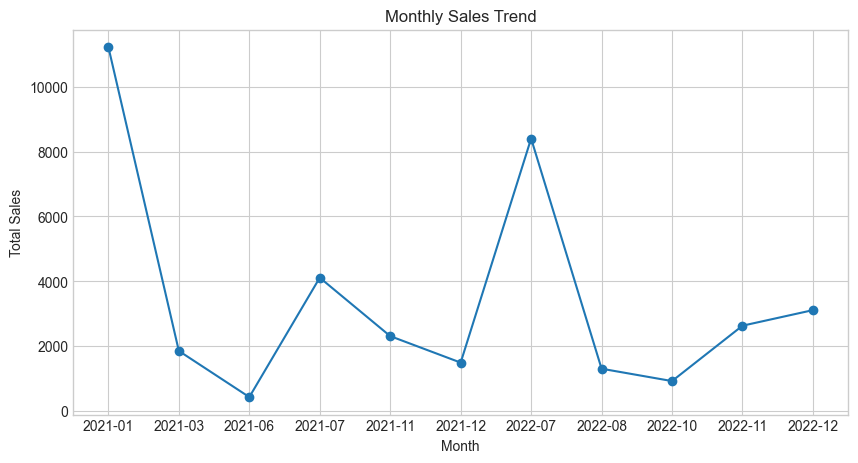

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


# 2-Category comparison

visualize sales by product category to see which categories earn the most

In [85]:
#visualize sales by product category to see which categories earn the most
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
category_sales


Category
Electronics    145302.73
Accessories    139236.48
Unknown        131365.45
Gadgets        123829.47
Name: Sales, dtype: float64

A bar chart for category sales

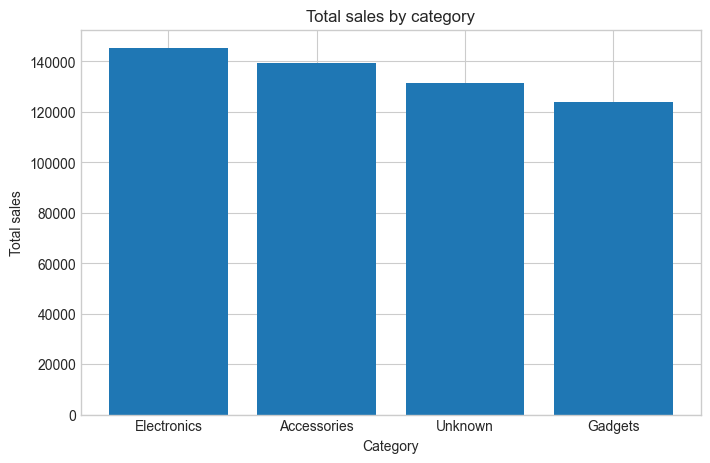

In [86]:
#We’ll use a bar plot, which is perfect for category comparisons
plt.figure(figsize=(8, 5))
plt.bar(category_sales.index, category_sales.values)
plt.title("Total sales by category")
plt.xlabel("Category")
plt.ylabel("Total sales")
plt.show()

# 3-Top customers by total sales

In [87]:
#Next visualization, Top customers by total sales
#This helps you spot your most valuable customers
#Conceptually, it’s the same pattern:
#1-Group by CustomerID
#2-Sum their Sales
#3-Sort descending
#4-Plot a bar chart (often horizontal, for readability)
top_customers = df.groupby("CustomerID")["Sales"].sum().sort_values(ascending=False).head(10)

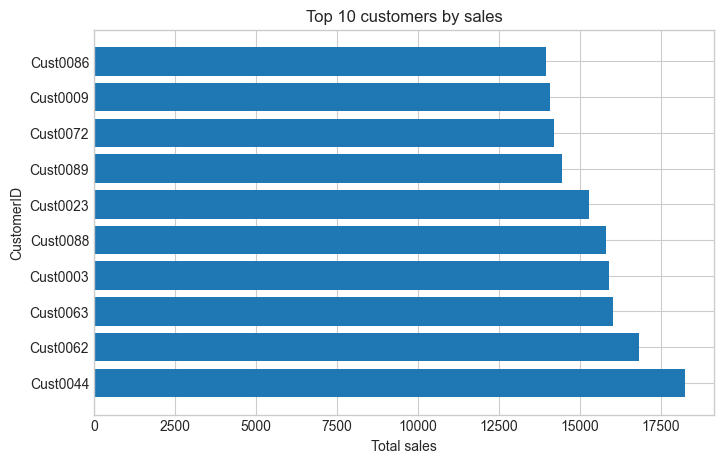

In [88]:
#Let’s visualize them with a horizontal bar chart (better for long names)
plt.figure(figsize=(8, 5))
plt.barh(top_customers.index, top_customers.values)
plt.title("Top 10 customers by sales")
plt.xlabel("Total sales")
plt.ylabel("CustomerID")
plt.show()